# Comparison of Various Algorithms

Determine the best algorithm for the following data using various metrics.

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 

In [28]:
df = pd.read_csv("data/breast-cancer-wiscon.csv") 
df.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
df.drop(['id'], inplace=True, axis=1)
df.diagnosis = [1 if i =="M" else 0 for i in df.diagnosis]

In [30]:
x = df.drop(['diagnosis'], axis=1).values
y = df.diagnosis.values

In [31]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2)

In [32]:
models = [LogisticRegression, DecisionTreeClassifier, KMeans]
predictions = [None]*3

In [33]:
def fit_model(x, y, x_test, *, model, classes):
    if model == KMeans:
        model = model(n_clusters=classes, max_iter=50)
        model = model.fit(x)
    else:
        model =  model()
        model.fit(x,y)
    
    
    prediction = model.predict(x_test)

    return model, prediction

In [34]:
def find_metrics(y_true, y_pred):
    cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots() 
    class_names = [0, 1] 
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, fmt = 'g', cmap = "Reds")
    ax.xaxis.set_label_position("top")
    plt.title(f"Confusion Matrix for Model #{i+1}")
    plt.ylabel("Actual Class Labels")
    plt.xlabel("Predicted Class Labels") 

    print(f"The Metrics for Model #{i+1} \n")
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("AUC:", metrics.roc_auc_score(y_test, y_pred))
    print("\n")

/home/xor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Metrics for Model #1 

Accuracy: 0.9385964912280702
Recall: 0.9111111111111111
Precision: 0.9318181818181818
AUC: 0.9338164251207729


The Metrics for Model #2 

Accuracy: 0.9210526315789473
Recall: 0.8888888888888888
Precision: 0.9090909090909091
AUC: 0.9154589371980676


The Metrics for Model #3 

Accuracy: 0.8157894736842105
Recall: 0.5555555555555556
Precision: 0.9615384615384616
AUC: 0.7705314009661837




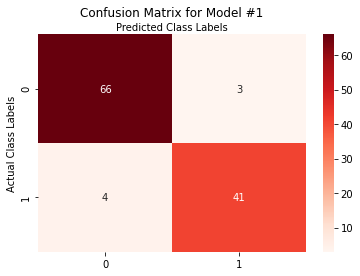

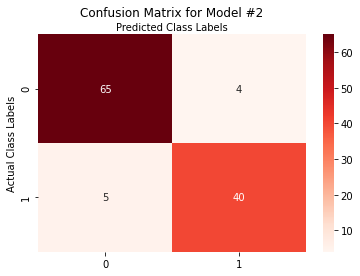

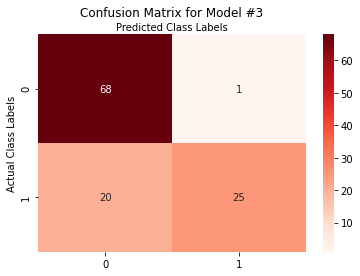

In [35]:
for i in range(len(models)):
    models[i], predictions[i] = fit_model(x_train, y_train, x_test, model=models[i], classes=2)
    find_metrics(y_test, predictions[i])

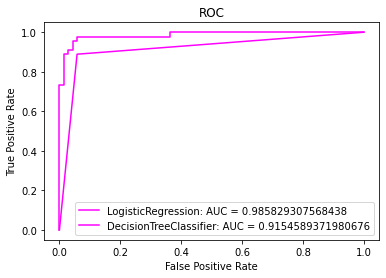

In [36]:
for i in range(len(models)):
    if i != 2:
        pred_y_proba = models[i].predict_proba(x_test)[::, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test, pred_y_proba)
        auc = metrics.roc_auc_score(y_test, pred_y_proba)
        plt.plot(fpr, tpr, label = f"{'LogisticRegression: ' if i == 0 else 'DecisionTreeClassifier: '}AUC = " + str(auc), color = 'magenta')
        plt.title("ROC")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend() 

As per the AUC score Logistic Regression does better than the Decision Tree Classifier